	Command set: SELECT `idx`, `idx_paper`, `content`, `video_visual`, `publishedAt`, `duration`, `channelId`, `viewCount`, `likeCount`, `dislikeCount`, `commentCount`, `favoriteCount`, `liveStreaming` FROM `scopus_videos_2014_comp`
	sql: SELECT `idx`, `idx_paper`, `content`, `video_visual`, `publishedAt`, `duration`, `channelId`, `viewCount`, `likeCount`, `dislikeCount`, `commentCount`, `favoriteCount`, `liveStreaming` FROM `scopus_videos_2014_comp`;
	Command set: SELECT `idx`, `channelId`, `subscriberCount` FROM `channels`
	sql: SELECT `idx`, `channelId`, `subscriberCount` FROM `channels`;
[+]Processing 1 of 148 videos
[+]Processing 2 of 148 videos
[+]Processing 3 of 148 videos
[+]Processing 4 of 148 videos
[+]Processing 5 of 148 videos
[+]Processing 6 of 148 videos
[+]Processing 7 of 148 videos
[+]Processing 8 of 148 videos
[+]Processing 9 of 148 videos
[+]Processing 10 of 148 videos
[+]Processing 11 of 148 videos
[+]Processing 12 of 148 videos
[+]Processing 13 of 148 videos
[+]Process

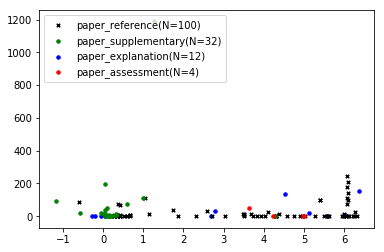

<Figure size 1152x432 with 0 Axes>

In [3]:
import numpy as np
import pandas as pd
from db_handler import DBHandler
from matplotlib import pyplot as plt
# from scipy import stats
from datetime import datetime, timedelta, date
# from calendar import monthrange
%matplotlib inline

db_handler = DBHandler()
_list_fields = [
    "idx",
    "idx_paper",
    "content",
    "video_visual",
    "publishedAt",
    "duration",
    "channelId",
    "viewCount",
    "likeCount",
    "dislikeCount",
    "commentCount",
    "favoriteCount",
    "liveStreaming"
]
db_handler.sql_handler.select(
    "scopus_videos_2014_comp",
    _list_fields
)
    # ).where("idx", 135, "<").where("content", ["paper_explanation", "paper_reference"], "in")
# ).where("idx", 135, "<")
# ).where("idx", 135, "<").where("content", "paper_supplementary")
_list_videos = db_handler.execute().fetchall()
_list_dict_videos = list(
    map(lambda _row: dict(zip(_list_fields, _row)), _list_videos))

# Channels : Get subscriber count
db_handler.sql_handler.select(
    "channels",
    ["idx", "channelId", "subscriberCount"]
)
_list_channels = db_handler.execute().fetchall()
# {channelId : tuple(...), ...}
_dict_channels = dict(
    zip(list(map(lambda _row: _row[1], _list_channels)), _list_channels))

dict_content_key = dict()
dict_content_key["paper_explanation"] = "paper_explanation"
dict_content_key["paper_reference"] = "paper_reference"
dict_content_key["paper_linked_supplementary"] = "paper_supplementary"
dict_content_key["paper_supplementary"] = "paper_supplementary"
dict_content_key["paper_application"] = "paper_assessment"
dict_content_key["paper_assessment"] = "paper_assessment"
dict_x = dict()
dict_x["paper_explanation"] = list()
dict_x["paper_reference"] = list()
dict_x["paper_supplementary"] = list()
dict_x["paper_assessment"] = list()
dict_y = dict()
dict_y["paper_explanation"] = list()
dict_y["paper_reference"] = list()
dict_y["paper_supplementary"] = list()
dict_y["paper_assessment"] = list()

df = pd.read_csv("scopus/scopus_math+comp_top5perc_1401-1406.csv", header=0)

for _i, _dict_row in enumerate(_list_dict_videos):
    print("[+]Processing %d of %d videos" % (_i+1, len(_list_dict_videos)))
    # Calc age
    _date_video = _dict_row["publishedAt"].date()
    _scopus_row = df[df["DOI"] == _dict_row["idx_paper"]]
    if len(_scopus_row) > 1:
        _scopus_row = _scopus_row.iloc[0]
    _date_paper = date(_scopus_row["Year"], _scopus_row["Month"], 1)
    _age = (_date_video - _date_paper).days/365
    _dict_row["age"] = _age

    # Age - Scaled View
    # Calc view/subscriber
    _dict_row["scaled_view"] = _dict_row["viewCount"] / _dict_channels[_dict_row["channelId"]
                                                                       ][2] if _dict_channels[_dict_row["channelId"]][2] != 0 else _dict_row["viewCount"]
    dict_y[dict_content_key[_dict_row["content"]]].append(_dict_row["scaled_view"])

    # Age - Scaled Like
    # Calc like/subscriber
    # _dict_row["scaled_like"] = _dict_row["likeCount"] / _dict_channels[_dict_row["channelId"]
    #                                                                    ][2] if _dict_channels[_dict_row["channelId"]][2] != 0 else _dict_row["likeCount"]
    # dict_y[dict_content_key[_dict_row["content"]]].append(
    #     _dict_row["scaled_like"])

    # Age - View
    # dict_y[dict_content_key[_dict_row["content"]]].append(_dict_row["viewCount"])

    # Age - Like
    # dict_y[dict_content_key[_dict_row["content"]]].append(
    #     _dict_row["likeCount"])

    # Boxplot: like/dislike
    # if _dict_row["likeCount"] in (None, 0) or _dict_row["dislikeCount"] == None:
    #     continue
    # _dict_row["r_like_dislike"] = _dict_row["likeCount"] / _dict_row["dislikeCount"] if _dict_row["dislikeCount"] != 0 else _dict_row["likeCount"]
    # dict_y[dict_content_key[_dict_row["content"]]].append(_dict_row["r_like_dislike"])

    # Add x
    dict_x[dict_content_key[_dict_row["content"]]].append(_dict_row["age"])

# Boxplot
# Multiple box plots on one Axes
# fig, ax = plt.subplots()
# ax.boxplot(list(dict_y.values()), sym="b*")
# ax.set_yscale("log")
# plt.title('Excluding: count unavailable or like == 0')
# list_xticks = list()
# for _key in dict_y.keys():
#     list_xticks.append("%s\n(N=%d)"%(_key, len(dict_y[_key])))
# plt.xticks([1, 2, 3, 4],
#            list_xticks)
# plt.show()

# Scatter
exp = plt.scatter(x=dict_x["paper_explanation"],
                  y=dict_y["paper_explanation"], s=12, marker="o", color="blue")
ref = plt.scatter(x=dict_x["paper_reference"],
                  y=dict_y["paper_reference"], s=12, marker="x", color="black")
sup = plt.scatter(x=dict_x["paper_supplementary"],
                  y=dict_y["paper_supplementary"], s=12, marker="o", color="green")
ass = plt.scatter(x=dict_x["paper_assessment"],
                  y=dict_y["paper_assessment"], s=12, marker="o", color="red")

plt.legend((ref, sup, exp, ass),
           (
               "paper_reference(N=%d)" % len(dict_y["paper_reference"]),
               "paper_supplementary(N=%d)" % len(dict_y["paper_supplementary"]),
               "paper_explanation(N=%d)" % len(dict_y["paper_explanation"]),
               "paper_assessment(N=%d)" % len(dict_y["paper_assessment"]),
            ),
           scatterpoints=1,
           loc='upper left',
           fontsize=10
)

plt.figure(figsize=(16, 6))
# xs = dict_x["paper_explanation"] + dict_x["paper_reference"] + \
#     dict_x["paper_supplementary"] + dict_x["paper_assessment"]
# ys = dict_y["paper_explanation"] + dict_y["paper_reference"] + \
#     dict_y["paper_supplementary"] + dict_y["paper_assessment"]
# cs = ["blue"] * len(dict_y["paper_explanation"]) + ["black"] * len(dict_y["paper_reference"]) + \
#     ["green"] * len(dict_y["paper_supplementary"]) + \
#     ["red"] * len(dict_y["paper_assessment"])
# plt.scatter(x=xs, y=ys, s=10, c=cs)

plt.show()